# **Aprendizaje no supervisado**

## **Análisis de Componenetes Principales - Identificación de la dirección de objetos**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [2]:
import numpy as np
import cv2
import requests
from IPython.display import Image
from google.colab.patches import cv2_imshow
from math import atan2, cos, sin, sqrt, pi
from io import BytesIO
import matplotlib.pyplot as plt


# Renderizamos la imágen de referencia

In [3]:
#image_path = 'https://img.freepik.com/vector-premium/dibujo-flecha-negra-negrita_687236-952.jpg'
image_path = 'flecha.jpg'
Image(url=image_path)


# Se utiliza algoritmo de Otsu para convertir en blanco y negro

In [4]:
response = requests.get(image_path, stream=True)
response.raise_for_status()

image = np.asarray(bytearray(response.content), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

MissingSchema: Invalid URL 'flecha.jpg': No scheme supplied. Perhaps you meant https://flecha.jpg?

In [5]:
cv2_imshow(bw)


NameError: name 'cv2_imshow' is not defined

# Identificación automatica de contornos en la imagen

In [ ]:
contours, _ = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Funciones para obtener la orientación de cada contorno usando PCA y función para dibujar las orientaciones para cada contorno

In [ ]:
def get_orientation(pts, img):
    sz = len(pts)
    data_pts = np.empty((sz, 2), dtype=np.float64)

    for i in range(data_pts.shape[0]):
        data_pts[i,0] = pts[i,0,0]
        data_pts[i,1] = pts[i,0,1]

    mean = np.empty((0))
    mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean)

    cntr = (int(mean[0,0]), int(mean[0,1]))
    cv2.circle(img, cntr, 3, (255, 0, 255), 2)
    p1 = (cntr[0] + 0.01 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 0.01 *  eigenvectors[0,1] * eigenvalues[0,0])
    p2 = (cntr[0] - 0.01 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.01 * eigenvectors[1,1] * eigenvalues[1,0])
    draw_axis(img, cntr, p1, (0, 150, 0), 1)
    draw_axis(img, cntr, p2, (200, 150, 0), 5)
    angle = atan2(eigenvectors[0,1], eigenvectors[0,0])

    return angle, img

def draw_axis(img, p_, q_, colour, scale):
    p = list(p_)
    q = list(q_)
    angle = atan2(p[1] - q[1], p[0] - q[0])
    hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))

    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)
    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)

# Para cada contorno se calcula el area y se descarta contornos pequeños, se dibuja los contornos y las orientaciones sobre la imagen.

0
20944.0


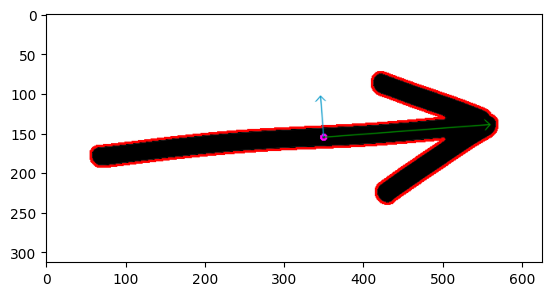

In [ ]:
for i,c in enumerate(contours):
  area = cv2.contourArea(c)

  if area < 1e3 or 1e5 < area:
    continue

  print(i)
  print(area)

  a = cv2.drawContours(image, contours, i, (0, 0, 255), 2)
  b, a = get_orientation(c,image)

plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))
plt.show()

## **Taller grupal**

In [ ]:
image_path2 = 'https://img.freepik.com/vector-gratis/flechas-finas-gruesas_78370-343.jpg'

* Pruebe la anterior implementación con la imagen de image_path2

* Enumere cada objeto y determine para cada objeto, con cuales otros objetos de la escena puede existir colisión.